In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data
path_train = 'app_train.csv'
path_test ='app_test.csv'
prev = pd.read_csv('prev_app.csv')
ins = pd.read_csv('installment_payment.csv')
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)
train.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [3]:
# drop unnamed column because I dont know what it is about, is it a previous loan id or something else
train.drop(['Unnamed: 0'], axis=1, inplace = True)
test.drop(['Unnamed: 0'], axis=1, inplace = True)

In [4]:
train.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [5]:
test.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,Working,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,Working,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,Working,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,Working,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,Working,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774


### 1. Feature Extraction from Previous Data

In this part, I would extract a derivative feature from two others datasets, prev_app.csv and installment_payment.csv. Those datasets contain the past application data for each loan id (LN_ID). We can use this data to be one of the consideration to classify the costumers repayment capability.

#### From prev_app data

For prev_app.csv data, I can extract a derivative feature called APPROVED_SCORE based on the CONTRACT_STATUS of previous application data, is it 'Approved', 'Refused', 'Cancelled', or 'Unused offer'. The smaller the score, the more likely the costumer loan application will be approved and vice versa (this is mean to get the positive correlation with the target variable because 0 it means the more likely the costumer will repay the loan). So I make a score vocabulary based in the each CONTRACT_STATUS. This score based on the assumptions that costumers with Unused offer status and Cancelled status have a particular meaning.

    1. 'Approved' status will be scored 0
    2. 'Unused offer' status will be scored 1
    3. 'Cancelled' status will be scored 2
    4. 'Refused' status will be scored 3

In [6]:
prev.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0


In [7]:
prev['CONTRACT_STATUS'].value_counts()

Approved        219687
Canceled         64590
Refused          60795
Unused offer      5640
Name: CONTRACT_STATUS, dtype: int64

In [8]:
# define the function to get the score
def approved_score(x) :
    if x == 'Approved' :
        return 0
    if x == 'Unused offer' :
        return 1
    if x == 'Canceled' :
        return 2
    if x == 'Refused' :
        return 4

In [9]:
prev['APPROVED_SCORE'] = prev['CONTRACT_STATUS'].apply(approved_score)
prev.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,APPROVED_SCORE
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0,0
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0,0
2,5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0,0
3,6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN,2
4,10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0,0


In [10]:
# we can sum the result to get the approved score for each loan id (LN_ID)
approved_score = prev.groupby('LN_ID')['APPROVED_SCORE'].sum().reset_index()
approved_score.head()

,LN_ID,APPROVED_SCORE
0,100009,0
1,100039,2
2,100044,0
3,100045,0
4,100046,4


#### For installment_payment data

For the installment_payment data, I will extract a derivative feature called IS_LATE_SCORE based on the INST_DAYS and PAY_DAYS or in other word is the repayment of the loan overdue or not. The score will be accumulated for each loan id (LN_ID). The higher the score, the more the costumer pay late.

In [11]:
ins.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,5,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375
1,8,2723183,112102,14,-197.0,-197.0,70.740,70.740
2,11,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080
3,17,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450
4,18,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000


In [12]:
ins['DUE'] = ins['INST_DAYS'] - ins['PAY_DAYS']
ins.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY,DUE
0,5,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375,33.0
1,8,2723183,112102,14,-197.0,-197.0,70.740,70.740,0.0
2,11,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080,7.0
3,17,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450,11.0
4,18,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000,13.0


In [13]:
def islate(x) :
    if (x >= 0) :
        return 0 #not late
    else :
        return 1 #late

In [14]:
ins['IS_LATE_SCORE'] = ins['DUE'].apply(islate)
ins.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY,DUE,IS_LATE_SCORE
0,5,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375,33.0,0
1,8,2723183,112102,14,-197.0,-197.0,70.740,70.740,0.0,0
2,11,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080,7.0,0
3,17,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450,11.0,0
4,18,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000,13.0,0


In [15]:
late_score = ins.groupby('LN_ID')['IS_LATE_SCORE'].sum().reset_index()
late_score.head()

,LN_ID,IS_LATE_SCORE
0,100009,1
1,100039,0
2,100044,6
3,100045,9
4,100046,0


#### Append the derivative features into one dataframe

In [16]:
derivative_feature = pd.merge(approved_score, late_score, on='LN_ID')
derivative_feature.head()

,LN_ID,APPROVED_SCORE,IS_LATE_SCORE
0,100009,0,1
1,100039,2,0
2,100044,0,6
3,100045,0,9
4,100046,4,0


### 2. Handling Missing Data

#### for train data

In [17]:
# count missing data
missing_train = train.isnull()
missing_train.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# count missing value
for column in missing_train.columns.values.tolist():
    print(column)
    print (missing_train[column].value_counts())
    print("")    

LN_ID
False    61503
Name: LN_ID, dtype: int64

TARGET
False    61503
Name: TARGET, dtype: int64

CONTRACT_TYPE
False    61503
Name: CONTRACT_TYPE, dtype: int64

GENDER
False    61503
Name: GENDER, dtype: int64

NUM_CHILDREN
False    61503
Name: NUM_CHILDREN, dtype: int64

INCOME
False    61503
Name: INCOME, dtype: int64

APPROVED_CREDIT
False    61503
Name: APPROVED_CREDIT, dtype: int64

ANNUITY
False    61502
True         1
Name: ANNUITY, dtype: int64

PRICE
False    61441
True        62
Name: PRICE, dtype: int64

INCOME_TYPE
False    61503
Name: INCOME_TYPE, dtype: int64

EDUCATION
False    61503
Name: EDUCATION, dtype: int64

FAMILY_STATUS
False    61503
Name: FAMILY_STATUS, dtype: int64

HOUSING_TYPE
False    61503
Name: HOUSING_TYPE, dtype: int64

DAYS_AGE
False    61503
Name: DAYS_AGE, dtype: int64

DAYS_WORK
False    61503
Name: DAYS_WORK, dtype: int64

DAYS_REGISTRATION
False    61503
Name: DAYS_REGISTRATION, dtype: int64

DAYS_ID_CHANGE
False    61503
Name: DAYS_ID_CHANGE, dt

The EXT_SCORE columns should be complemented each other. Just take the mean of columns EXT_SCORE_1, EXT_SCORE_2, and EXT_SCORE_3

In [19]:
train['EXT_SCORE'] = train[['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3']].mean(axis=1)
train.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,EXT_SCORE
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN,0.590541
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN,0.669949
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,...,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022,0.664854
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,...,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674,0.667207
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595,0.251367


In [20]:
# drop columns EXT_SCORE_1, EXT_SCORE_2, and EXT_SCORE_3
train.drop(['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3'], axis=1, inplace=True)

In [21]:
train.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,Married,With parents,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.590541
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,Married,House / apartment,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.669949
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,...,Married,House / apartment,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,0.664854
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,...,Married,House / apartment,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,0.667207
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,Single / not married,House / apartment,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.251367


the missing values is just on the annuity and the price column

In [22]:
#for annuity column, search where the index where are the missing value on it
train[train['ANNUITY'].isnull()].index.tolist()

[43406]

In [23]:
# search the particular index
train.iloc[43403:43410]

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE
43403,328329,0,Cash loans,M,0,135000.0,1056447.0,31018.5,922500.0,Commercial associate,...,Married,House / apartment,-21300,-7047,-9058.0,-3648,TUESDAY,8,Industry: type 2,0.493341
43404,134719,0,Cash loans,F,0,121500.0,1125000.0,32895.0,1125000.0,Working,...,Married,House / apartment,-13621,-2831,-4527.0,-5233,SUNDAY,10,Transport: type 2,0.467236
43405,241624,0,Cash loans,M,0,103500.0,450000.0,27324.0,450000.0,Working,...,Married,House / apartment,-15622,-2926,-3709.0,-2661,THURSDAY,8,Medicine,0.516834
43406,169487,0,Cash loans,M,0,202500.0,360000.0,NaN,360000.0,Working,...,Single / not married,House / apartment,-19762,-2498,-11285.0,-3305,FRIDAY,15,Other,0.469667
43407,264525,0,Cash loans,F,1,108000.0,253737.0,27054.0,229500.0,Working,...,Married,House / apartment,-12132,-121,-3940.0,-3940,TUESDAY,15,Agriculture,0.421874
43408,426035,0,Cash loans,F,1,130500.0,781920.0,28215.0,675000.0,Working,...,Single / not married,House / apartment,-15919,-3090,-9681.0,-2566,TUESDAY,13,Business Entity Type 3,0.643833
43409,334136,0,Cash loans,F,0,202500.0,129519.0,14742.0,121500.0,Commercial associate,...,Married,House / apartment,-16609,-961,-250.0,-139,SUNDAY,11,Business Entity Type 3,0.465316


We can see that the profile of the loan id which has the NaN value is almost the same with its up and down neighboors. So we can take the average of the neighboors to obtain the estimate values to replace the NaN

In [24]:
avg_ann = train['ANNUITY'][43405:43408].astype('float').mean(axis=0)
avg_ann

27189.0

In [25]:
# replace the NaN value on Annuity column
train['ANNUITY'].replace(np.nan, avg_ann, inplace=True)

In [26]:
# see the replaced rows
train.iloc[43406]

LN_ID                                       169487
TARGET                                           0
CONTRACT_TYPE                           Cash loans
GENDER                                           M
NUM_CHILDREN                                     0
INCOME                                      202500
APPROVED_CREDIT                             360000
ANNUITY                                      27189
PRICE                                       360000
INCOME_TYPE                                Working
EDUCATION            Secondary / secondary special
FAMILY_STATUS                 Single / not married
HOUSING_TYPE                     House / apartment
DAYS_AGE                                    -19762
DAYS_WORK                                    -2498
DAYS_REGISTRATION                           -11285
DAYS_ID_CHANGE                               -3305
WEEKDAYS_APPLY                              FRIDAY
HOUR_APPLY                                      15
ORGANIZATION_TYPE              

In [27]:
# for Price column, search where the index where are the missing value on it
train[train['PRICE'].isnull()].index.tolist()

[722,
 1448,
 1509,
 4378,
 5267,
 5824,
 7167,
 7887,
 9131,
 9183,
 10118,
 10997,
 11357,
 11438,
 11796,
 13179,
 14699,
 16848,
 16926,
 18198,
 18560,
 19896,
 21220,
 25570,
 25616,
 26071,
 26224,
 29140,
 29801,
 32382,
 34079,
 34568,
 34988,
 35321,
 36324,
 38628,
 38676,
 39162,
 39489,
 40050,
 40581,
 42771,
 44610,
 45648,
 47016,
 48559,
 49108,
 49547,
 49896,
 50432,
 50693,
 50955,
 51530,
 51840,
 52934,
 53975,
 55726,
 56644,
 57530,
 58776,
 58803,
 58840]

to simplify the calculation, we can replace the NaN value in PRICE column with the average of the total price data.

In [28]:
avg_price = train['PRICE'].astype('float').mean(axis=0)
avg_price

536903.3198108755

In [29]:
# replace the missing value
train['PRICE'].replace(np.nan, avg_price, inplace=True)

In [30]:
# chech particular cell whether it's already replaced or not
train['PRICE'][58840]

536903.3198108755

In [31]:
# check the data type of each column
train.dtypes

LN_ID                  int64
TARGET                 int64
CONTRACT_TYPE         object
GENDER                object
NUM_CHILDREN           int64
INCOME               float64
APPROVED_CREDIT      float64
ANNUITY              float64
PRICE                float64
INCOME_TYPE           object
EDUCATION             object
FAMILY_STATUS         object
HOUSING_TYPE          object
DAYS_AGE               int64
DAYS_WORK              int64
DAYS_REGISTRATION    float64
DAYS_ID_CHANGE         int64
WEEKDAYS_APPLY        object
HOUR_APPLY             int64
ORGANIZATION_TYPE     object
EXT_SCORE            float64
dtype: object

#### for test data

In [32]:
# check missing value
missing_test = test.isnull()
missing_test.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
# count missing value
for column in missing_test.columns.values.tolist():
    print(column)
    print (missing_test[column].value_counts())
    print("") 

LN_ID
False    14761
Name: LN_ID, dtype: int64

TARGET
False    14761
Name: TARGET, dtype: int64

CONTRACT_TYPE
False    14761
Name: CONTRACT_TYPE, dtype: int64

GENDER
False    14761
Name: GENDER, dtype: int64

NUM_CHILDREN
False    14761
Name: NUM_CHILDREN, dtype: int64

INCOME
False    14761
Name: INCOME, dtype: int64

APPROVED_CREDIT
False    14761
Name: APPROVED_CREDIT, dtype: int64

ANNUITY
False    14761
Name: ANNUITY, dtype: int64

PRICE
False    14741
True        20
Name: PRICE, dtype: int64

INCOME_TYPE
False    14761
Name: INCOME_TYPE, dtype: int64

EDUCATION
False    14761
Name: EDUCATION, dtype: int64

FAMILY_STATUS
False    14761
Name: FAMILY_STATUS, dtype: int64

HOUSING_TYPE
False    14761
Name: HOUSING_TYPE, dtype: int64

DAYS_AGE
False    14761
Name: DAYS_AGE, dtype: int64

DAYS_WORK
False    14761
Name: DAYS_WORK, dtype: int64

DAYS_REGISTRATION
False    14761
Name: DAYS_REGISTRATION, dtype: int64

DAYS_ID_CHANGE
False    14761
Name: DAYS_ID_CHANGE, dtype: int64

WEE

The EXT_SCORE columns should be complemented each other. Just take the mean of columns EXT_SCORE_1, EXT_SCORE_2, and EXT_SCORE_3

In [34]:
test['EXT_SCORE'] = test[['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3']].mean(axis=1)
test.drop(['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3'], axis=1, inplace=True)

In [35]:
test.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,FAMILY_STATUS,HOUSING_TYPE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE
0,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,Working,...,Married,House / apartment,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,0.398367
1,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,Working,...,Married,Office apartment,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,0.682675
2,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,Working,...,Married,House / apartment,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.753135
3,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,Working,...,Married,House / apartment,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.241522
4,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,Working,...,Married,House / apartment,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.457236


the missing values is just on the price column

In [36]:
# for Price column, search where the index where are the missing value on it
test[test['PRICE'].isnull()].index.tolist()

[183,
 1973,
 3473,
 3566,
 3833,
 4227,
 5681,
 5934,
 6185,
 6616,
 8016,
 8159,
 8626,
 9208,
 9256,
 10508,
 11675,
 12684,
 14140,
 14516]

to simplify the calculation, we can replace the NaN value in PRICE column with the average of the total price data.

In [37]:
avg_pr = test['PRICE'].astype('float').mean(axis=0)
avg_pr

536192.9102503222

In [38]:
# replace the missing value
test['PRICE'].replace(np.nan, avg_pr, inplace=True)

In [39]:
# chech particular cell whether it's already replaced or not
test['PRICE'][1973]

536192.9102503222

In [40]:
# check the data type of each column
test.dtypes

LN_ID                  int64
TARGET                 int64
CONTRACT_TYPE         object
GENDER                object
NUM_CHILDREN           int64
INCOME               float64
APPROVED_CREDIT      float64
ANNUITY              float64
PRICE                float64
INCOME_TYPE           object
EDUCATION             object
FAMILY_STATUS         object
HOUSING_TYPE          object
DAYS_AGE               int64
DAYS_WORK              int64
DAYS_REGISTRATION    float64
DAYS_ID_CHANGE         int64
WEEKDAYS_APPLY        object
HOUR_APPLY             int64
ORGANIZATION_TYPE     object
EXT_SCORE            float64
dtype: object

### 3. Finalization the Train and Test Data

In this part, I want to merge the derivative features to the train and test data. 

In [41]:
train_fin = pd.merge(train, derivative_feature, on='LN_ID')
test_fin = pd.merge(test, derivative_feature, on='LN_ID')
train_fin.isnull().sum()

LN_ID                 0
TARGET                0
CONTRACT_TYPE         0
GENDER                0
NUM_CHILDREN          0
INCOME                0
APPROVED_CREDIT       0
ANNUITY               0
PRICE                 0
INCOME_TYPE           0
EDUCATION             0
FAMILY_STATUS         0
HOUSING_TYPE          0
DAYS_AGE              0
DAYS_WORK             0
DAYS_REGISTRATION     0
DAYS_ID_CHANGE        0
WEEKDAYS_APPLY        0
HOUR_APPLY            0
ORGANIZATION_TYPE     0
EXT_SCORE            13
APPROVED_SCORE        0
IS_LATE_SCORE         0
dtype: int64

We can just drop the rows that contains NAN values because it's not significant amount of data

In [42]:
train_fin.dropna(inplace=True)
test_fin.dropna(inplace=True)

In [43]:
train_fin.shape

(57984, 23)

### 4. Exploratory Data Analysis

In this part, I would see how every feature behave in terms of correlation to the target variable. There is a numerical variable and categorical variable. We have different approach on each variable.

#### See correlation for Numerical Variable

For numerical variable, we would use pearson correlation to see how an independent variable could affect the dependent variable.

In [44]:
# see correlation
train_fin.corr()

,LN_ID,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,EXT_SCORE,APPROVED_SCORE,IS_LATE_SCORE
LN_ID,1.000000,0.003041,-0.006598,0.007363,-0.000948,0.002683,-0.000236,-0.004586,0.000326,-0.005694,-0.002559,-0.001673,0.003850,0.003040,-0.001933
TARGET,0.003041,1.000000,0.017478,-0.017591,-0.037345,-0.015911,-0.046103,0.085324,-0.051905,0.039216,0.056308,-0.028415,-0.225552,0.063209,0.029909
NUM_CHILDREN,-0.006598,0.017478,1.000000,0.022873,0.006394,0.027036,0.002665,0.338077,-0.243367,0.181654,-0.035087,-0.006513,-0.063821,-0.031773,-0.009051
INCOME,0.007363,-0.017591,0.022873,1.000000,0.262227,0.330728,0.266207,0.046488,-0.114564,0.048334,0.018045,0.058834,0.067026,0.050510,0.012115
APPROVED_CREDIT,-0.000948,-0.037345,0.006394,0.262227,1.000000,0.769014,0.986229,-0.061169,-0.063589,0.009621,-0.008447,0.043762,0.144484,-0.033232,-0.007098
ANNUITY,0.002683,-0.015911,0.027036,0.330728,0.769014,1.000000,0.771828,0.013351,-0.110381,0.044748,0.011816,0.046012,0.120079,-0.002041,-0.001712
PRICE,-0.000236,-0.046103,0.002665,0.266207,0.986229,0.771828,1.000000,-0.060355,-0.061243,0.011250,-0.010257,0.054063,0.153205,-0.033810,-0.010397
DAYS_AGE,-0.004586,0.085324,0.338077,0.046488,-0.061169,0.013351,-0.060355,1.000000,-0.620231,0.323376,0.267114,0.089060,-0.278814,-0.034226,-0.058185
DAYS_WORK,0.000326,-0.051905,-0.243367,-0.114564,-0.063589,-0.110381,-0.061243,-0.620231,1.000000,-0.205885,-0.271903,-0.085994,0.090577,0.018101,0.019318
DAYS_REGISTRATION,-0.005694,0.039216,0.181654,0.048334,0.009621,0.044748,0.011250,0.323376,-0.205885,1.000000,0.101539,-0.010388,-0.126749,0.017070,-0.024302


<AxesSubplot:>

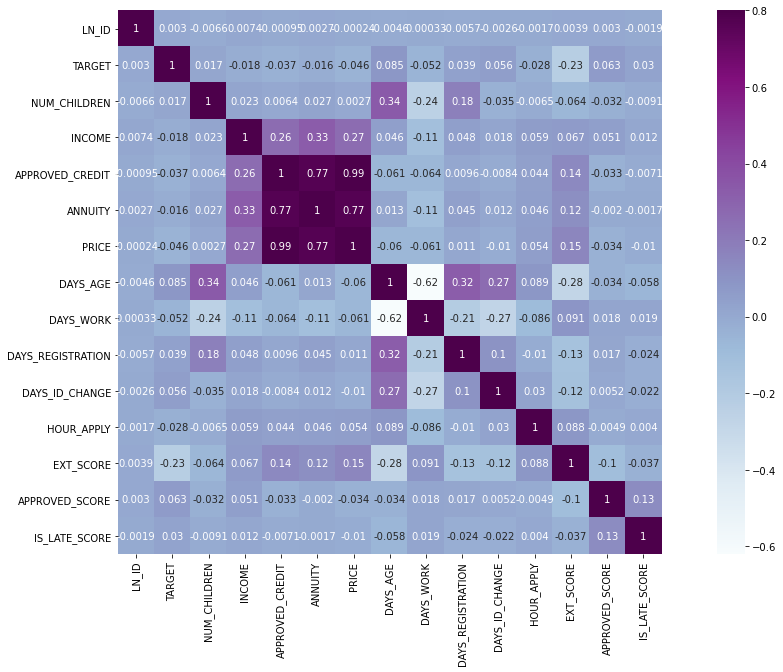

In [45]:
# using heatmap
matrix = train_fin.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

We can see that EXT_SCORE that has a significant correlation to the target variable. The other variables seems doesn't has significant correlation. But that's not the case. Because we're using Pearson correlation and this is a binary classification, we cannot conclude the correlation. So in this case, we can only see that there are independent variables that have a significant correlation to each other that can cause a multicollinearity problem. Even though this is a binary classification that multicollinearity doesn't affect very much, we can still eliminate the independent variables that has significant correlation each other (we can only take one variable left). In this case, APPROVED_CREDIT and PRICE have the significant correlation so we can eliminate one of those variables.

In [46]:
# eliminate the price column
train_fin.drop('PRICE', axis=1, inplace=True)
test_fin.drop('PRICE', axis=1, inplace=True)

In [47]:
train_fin.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,INCOME_TYPE,EDUCATION,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE,APPROVED_SCORE,IS_LATE_SCORE
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,Working,Secondary / secondary special,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.590541,0,0
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,Commercial associate,Secondary / secondary special,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.669949,4,27
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,Pensioner,Secondary / secondary special,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,0.664854,6,0
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,State servant,Higher education,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,0.667207,0,10
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,Commercial associate,Secondary / secondary special,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.251367,4,7


In [48]:
test_fin.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,INCOME_TYPE,EDUCATION,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE,APPROVED_SCORE,IS_LATE_SCORE
0,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,Working,Secondary / secondary special,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,0.398367,6,1
1,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,Working,Higher education,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,0.682675,0,2
2,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,Working,Secondary / secondary special,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.753135,2,1
3,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,Working,Secondary / secondary special,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.241522,36,2
4,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,Working,Incomplete higher,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.457236,8,0


#### See correlation for Categorical Variable

In this part, we would see how every categorical independent variable could significantly affect the target variable. We can see it through a pattern if some values of the variable has differentiate for each target variable value.

In [49]:
# see the categorical variable
train_fin.describe(include=[object])

,CONTRACT_TYPE,GENDER,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,WEEKDAYS_APPLY,ORGANIZATION_TYPE
count,57984,57984,57984,57984,57984,57984,57984,57984
unique,2,2,6,5,5,6,7,58
top,Cash loans,F,Working,Secondary / secondary special,Married,House / apartment,TUESDAY,Business Entity Type 3
freq,52768,38472,30204,41850,37221,51487,10233,12697


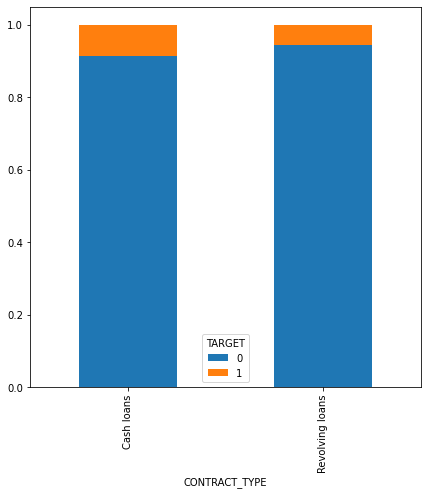

In [50]:
Contract=pd.crosstab(train_fin['CONTRACT_TYPE'],train_fin['TARGET'])
Contract.div(Contract.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.show()

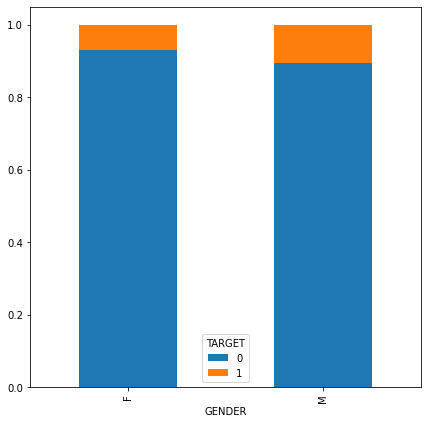

In [51]:
Gender=pd.crosstab(train_fin['GENDER'],train_fin['TARGET'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.show()

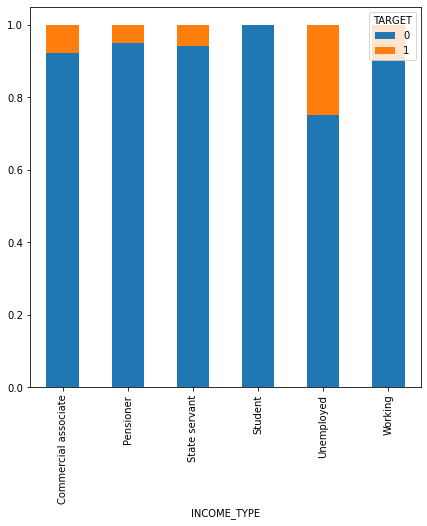

In [52]:
Income=pd.crosstab(train_fin['INCOME_TYPE'],train_fin['TARGET'])
Income.div(Income.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.show()

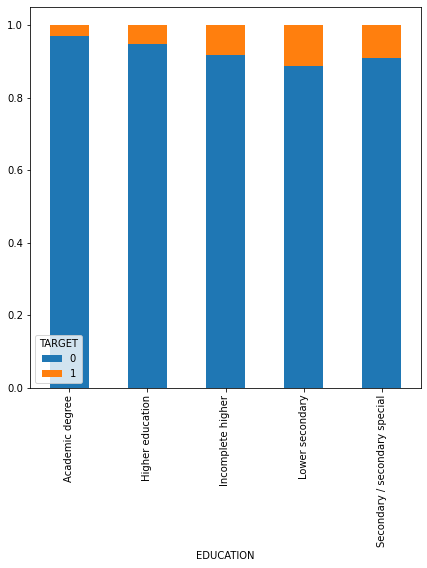

In [53]:
Edu=pd.crosstab(train_fin['EDUCATION'],train_fin['TARGET'])
Edu.div(Edu.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.show()

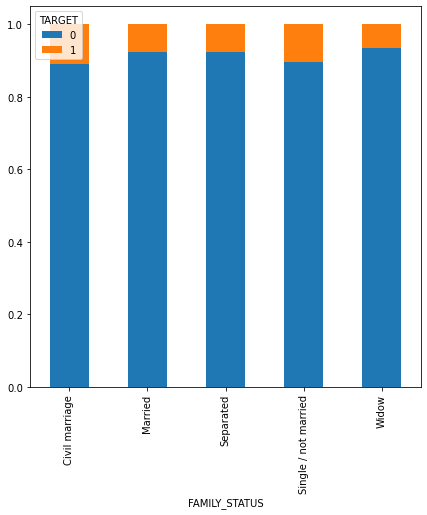

In [54]:
Fam=pd.crosstab(train_fin['FAMILY_STATUS'],train_fin['TARGET'])
Fam.div(Fam.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.show()

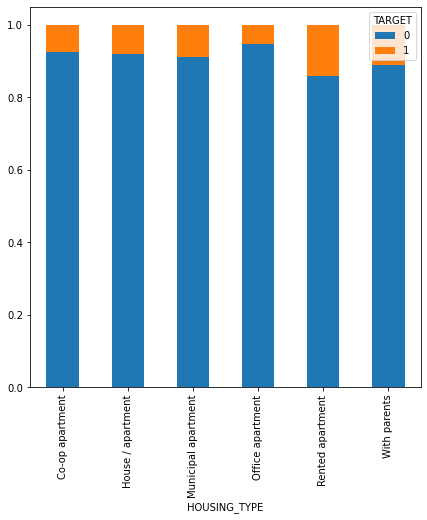

In [55]:
House=pd.crosstab(train_fin['HOUSING_TYPE'],train_fin['TARGET'])
House.div(House.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.show()

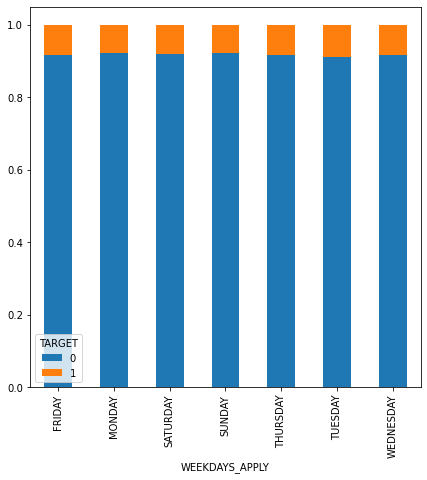

In [56]:
Weekdays=pd.crosstab(train_fin['WEEKDAYS_APPLY'],train_fin['TARGET'])
Weekdays.div(Weekdays.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(7,7))
plt.show()

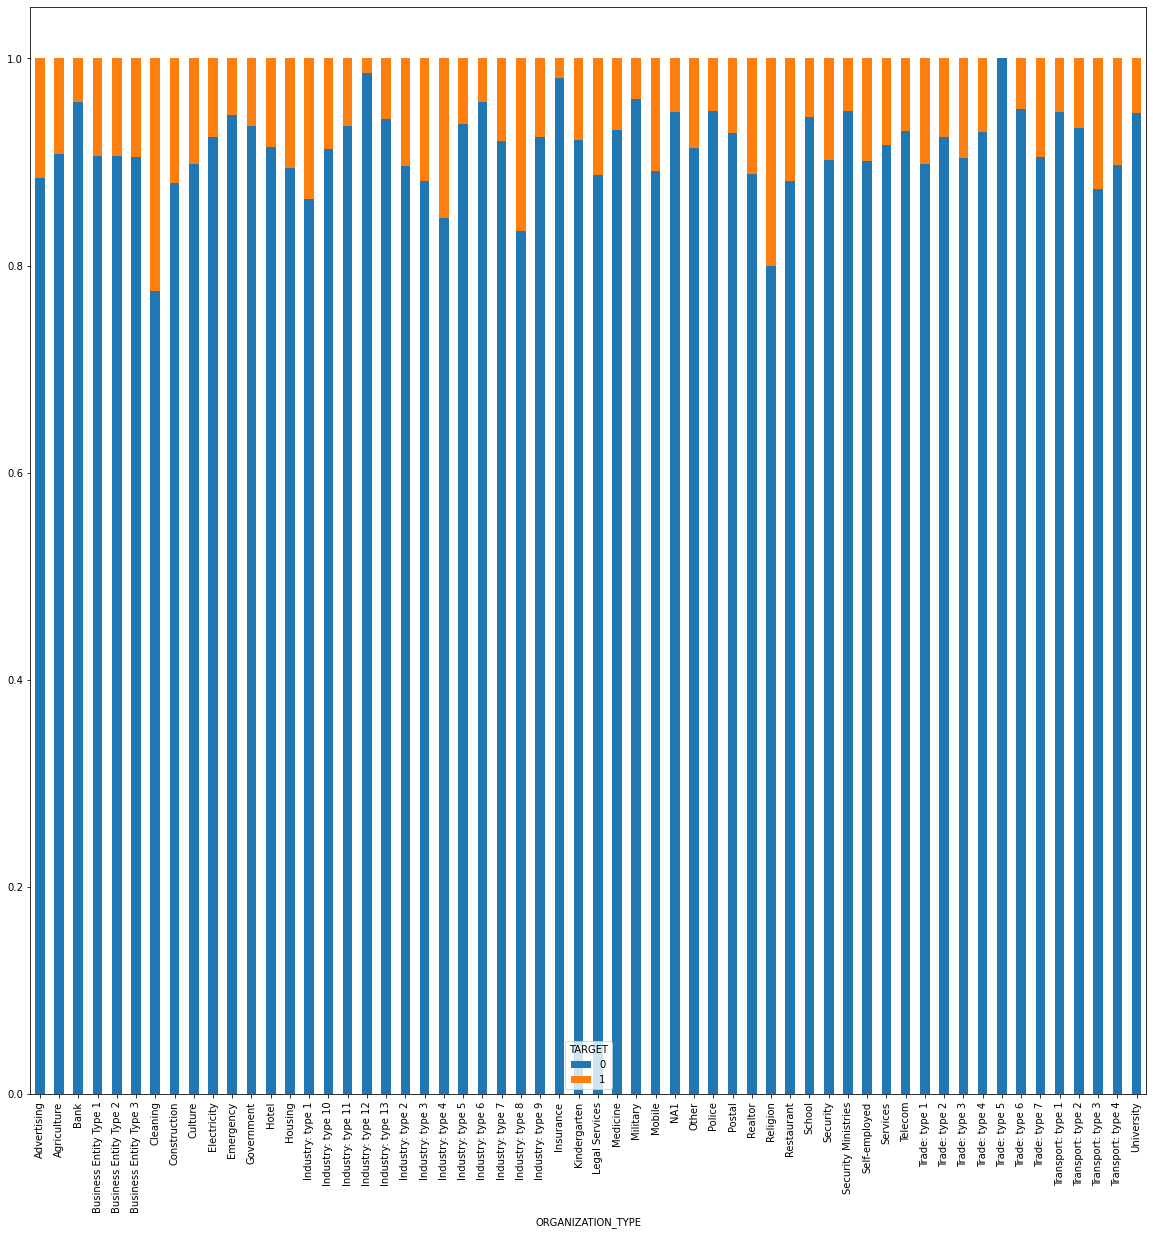

In [57]:
Org=pd.crosstab(train_fin['ORGANIZATION_TYPE'],train_fin['TARGET'])
Org.div(Org.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(20,20))
plt.show()

We could see that variable WEEKDAYS_APPLY is not a great variable to predict the target because almost of the value has the same distribution on each target value. So we can drop the WEEKDAYS_APPLY for the sake of simplicity, accuration and computation

In [58]:
train_fin.drop('WEEKDAYS_APPLY', axis=1, inplace=True)
test_fin.drop('WEEKDAYS_APPLY', axis=1, inplace=True)

### 6. Preprocessing Before Modeling

#### One Hot Encoding

In this part, we will convert the categorical variable to numerical variable before we input it to the model using One Hot Encoding method.

In [59]:
train_fin.describe(include=object)

,CONTRACT_TYPE,GENDER,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,ORGANIZATION_TYPE
count,57984,57984,57984,57984,57984,57984,57984
unique,2,2,6,5,5,6,58
top,Cash loans,F,Working,Secondary / secondary special,Married,House / apartment,Business Entity Type 3
freq,52768,38472,30204,41850,37221,51487,12697


In [60]:
cont_train = pd.get_dummies(train_fin['CONTRACT_TYPE'])
cont_test = pd.get_dummies(test_fin['CONTRACT_TYPE'])
cont_test.head()

,Cash loans,Revolving loans
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [61]:
gender_train = pd.get_dummies(train_fin['GENDER'])
gender_test = pd.get_dummies(test_fin['GENDER'])
gender_test.head()

,F,M
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [62]:
income_train = pd.get_dummies(train_fin['INCOME_TYPE'])
income_test = pd.get_dummies(test_fin['INCOME_TYPE'])
income_test.insert(3, 'Student', 0)
income_test.insert(4, 'Unemployed', 0)
income_test.head()

,Commercial associate,Pensioner,State servant,Student,Unemployed,Working
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [63]:
edu_train = pd.get_dummies(train_fin['EDUCATION'])
edu_test = pd.get_dummies(test_fin['EDUCATION'])
edu_train.head()

,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,0,1


In [64]:
fam_train = pd.get_dummies(train_fin['FAMILY_STATUS'])
fam_test = pd.get_dummies(test_fin['FAMILY_STATUS'])
fam_train.head()

,Civil marriage,Married,Separated,Single / not married,Widow
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0


In [65]:
house_train = pd.get_dummies(train_fin['HOUSING_TYPE'])
house_test = pd.get_dummies(test_fin['HOUSING_TYPE'])
house_test.head()

,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [66]:
org_train = pd.get_dummies(train_fin['ORGANIZATION_TYPE'])
org_test = pd.get_dummies(test_fin['ORGANIZATION_TYPE'])
org_train.head()

,Advertising,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,...,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
feature_train = train_fin.drop(['TARGET'], axis=1)
feature_test = test_fin.drop(['TARGET'], axis=1)
categories_train = [cont_train, gender_train, income_train, edu_train, fam_train, house_train, org_train]
categories_test = [cont_test, gender_test, income_test, edu_test, fam_test, house_test, org_test]
X_train = pd.concat([feature_train]+categories_train, axis=1)
X_test = pd.concat([feature_test]+categories_test, axis=1)
X_train.drop(['CONTRACT_TYPE', 'GENDER', 'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'ORGANIZATION_TYPE'], axis=1, inplace=True)
X_test.drop(['CONTRACT_TYPE', 'GENDER', 'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'ORGANIZATION_TYPE'], axis=1, inplace=True)

In [68]:
X_train

,LN_ID,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,...,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University
0,333538,1,67500.0,202500.0,10125.0,-11539,-921,-119.0,-2757,18,...,0,0,0,0,0,0,0,0,0,0
1,406644,1,202500.0,976711.5,49869.0,-15743,-4482,-1797.0,-2455,14,...,0,0,0,0,0,0,0,0,0,0
2,259130,0,180000.0,407520.0,25060.5,-20775,365243,-8737.0,-4312,14,...,0,0,0,0,0,0,0,0,0,0
3,411997,0,225000.0,808650.0,26086.5,-20659,-10455,-4998.0,-4010,10,...,0,0,0,0,0,0,0,0,0,0
4,241559,0,135000.0,180000.0,9000.0,-9013,-1190,-3524.0,-1644,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57992,131041,2,58500.0,148365.0,12024.0,-12953,-1916,-344.0,-3319,10,...,0,0,0,0,0,0,0,0,0,0
57993,251159,2,360000.0,450000.0,44509.5,-14268,-5813,-2313.0,-2709,6,...,0,0,0,0,0,0,0,0,0,0
57994,441376,0,441000.0,904500.0,38452.5,-21582,365243,-4106.0,-4191,12,...,0,0,0,0,0,0,0,0,0,0
57995,313981,0,94500.0,360000.0,17509.5,-11258,-4159,-5060.0,-3698,15,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# append y_train and y_test
y_train = train_fin['TARGET'].values
y_test = test_fin['TARGET'].values
y_train

array([0, 0, 0, ..., 1, 0, 0])

#### Normalize the Features

In [70]:
from sklearn import preprocessing
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test)
print ('Train set:', X_train_norm.shape,  y_train.shape)
print ('Test set:', X_test_norm.shape,  y_test.shape)

Train set: (57984, 97) (57984,)
Test set: (13908, 97) (13908,)


### 7. Modeling

In this part, we will compare every basic classification model such as K Nearest Neighbor, Logistic Regression, Support Vector Machine, and Random Forest and choose which one is the best classification model to this problem particularly based on the metrics accuracy.

#### K Nearest Neighbor (KNN)

KNN implementation in this case is actually does not simple because there are many features, meaning many computation to calculate every distance. So since finding the best k value is quite take some times, I just randomly choose the k value

In [71]:
# Train KNN Model with k=7
from sklearn.neighbors import KNeighborsClassifier
k = 7
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
knn

KNeighborsClassifier(n_neighbors=7)

In [72]:
# predict some value from test dataset
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
# Predict
y_knn = knn.predict(X_test_norm)
y_knn[0:5]

array([0, 0, 0, 0, 0])

In [73]:
# evaluation the metrics accuracy with jaccard score
jaccard_score(y_test, y_knn, pos_label=0)

0.9156288244186883

In [74]:
# evaluation the metrics accuracy with F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_knn, average='weighted')

0.8789762738154139

#### Logistic Regression

In [75]:
# train the logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_norm,y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

In [76]:
# predict some values from test dataset
y_log = lr.predict(X_test_norm)
y_log[0:5]

array([0, 0, 0, 0, 0])

In [77]:
# evaluation the metrics accuracy with jaccard score
jaccard_score(y_test, y_log, pos_label=0)

0.9166307006186161

In [78]:
# evaluation the metrics accuracy with F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_log, average='weighted')

0.8779877993311924

#### Random Forest

In [79]:
# train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40).fit(X_train_norm,y_train)
rf

RandomForestClassifier(n_estimators=40)

In [80]:
# predict some values from test dataset
y_rf = rf.predict(X_test_norm)
y_rf[0:5]

array([0, 0, 0, 0, 0])

In [81]:
# evaluation the metrics accuracy with jaccard score
jaccard_score(y_test, y_rf, pos_label=0)

0.9171461449942463

In [82]:
# evaluation the metrics accuracy with F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_rf, average='weighted')

0.8779670221008578

#### Support Vector Machine

SVM is a model that using a complex calculation (using some kerneling methods) so if the dataset go bigger, the calculation will take a long time to be calculated. So instead of using all of the dataset training, I use only several dataset to train the model, which are only 10% of the training dataset

In [98]:
# train the Support Vector Machine model
from sklearn import svm
sv = svm.SVC(kernel='rbf').fit(X_train_norm[0:6000], y_train[0:6000])
sv

SVC()

In [100]:
# predict some values from test dataset
y_svm = rf.predict(X_test_norm[0:1300])
y_svm[0:5]

array([0, 0, 0, 0, 0])

In [101]:
# evaluation the metrics accuracy with jaccard score
jaccard_score(y_test[0:1300], y_svm, pos_label=0)

0.9153194765204004

In [103]:
# evaluation the metrics accuracy with F1 Score
from sklearn.metrics import f1_score
f1_score(y_test[0:1300], y_svm, average='weighted')

0.8757029345252819

#### Desicion Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 2).fit(X_train_norm,y_train)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [107]:
# predict some values from test dataset
y_dt = dt.predict(X_test_norm)
y_dt[0:5]

array([0, 0, 0, 0, 0])

In [108]:
# evaluation the metrics accuracy with jaccard score
jaccard_score(y_test, y_dt, pos_label=0)

0.9170261719873454

In [109]:
# evaluation the metrics accuracy with F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_dt, average='weighted')

0.8773349184252197